In [5]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.initializers import GlorotNormal
import os

In [8]:
train_dir = 'kaggle/input/fruits-dataset-images/images'

In [9]:
os.path.exists(train_dir)

True

In [9]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [11]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

Found 359 images belonging to 9 classes.


In [42]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

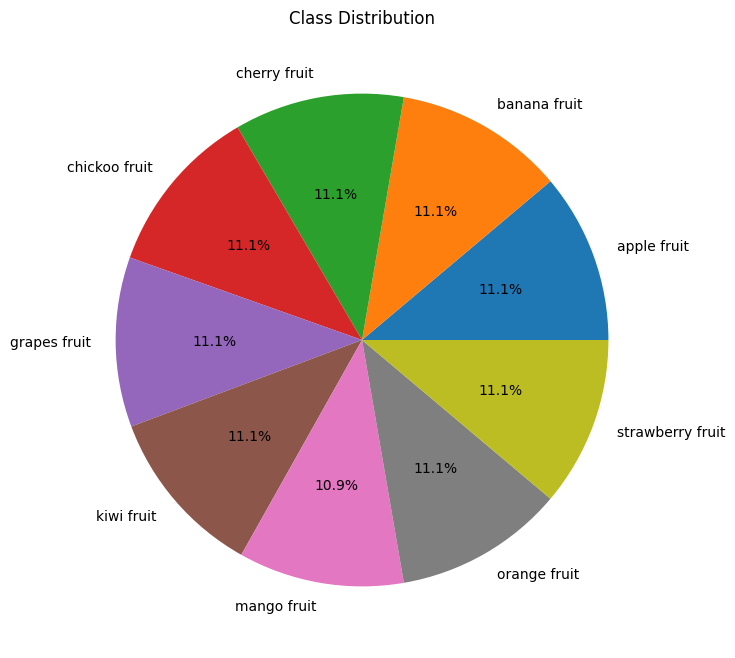

In [43]:
class_indices = train_generator.class_indices

# Get the class labels
class_labels = list(class_indices.keys())

# Count occurrences of each class
class_counts = Counter(train_generator.classes)

# Calculate percentages
total_samples = sum(class_counts.values())
percentages = [(class_counts[i] / total_samples) * 100 for i in range(len(class_labels))]

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(percentages, labels=class_labels, autopct='%1.1f%%')
plt.title('Class Distribution')
plt.show()

In [12]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(9, activation='softmax')
])

In [13]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * tf.math.exp(-0.1)
    
lr_sch = tf.keras.callbacks.LearningRateScheduler(scheduler)

In [15]:
num_epochs = 100
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=num_epochs,
    verbose=1,
    callbacks=[lr_sch]
)

Epoch 1/100


12/12 [==============================] - 12s 867ms/step - loss: 2.4896 - accuracy: 0.1448 - lr: 0.0010
Epoch 2/100
12/12 [==============================] - 11s 926ms/step - loss: 1.8198 - accuracy: 0.3036 - lr: 0.0010
Epoch 3/100
12/12 [==============================] - 11s 881ms/step - loss: 1.5252 - accuracy: 0.3955 - lr: 0.0010
Epoch 4/100
12/12 [==============================] - 11s 863ms/step - loss: 1.4152 - accuracy: 0.4708 - lr: 0.0010
Epoch 5/100
12/12 [==============================] - 10s 875ms/step - loss: 1.3055 - accuracy: 0.4958 - lr: 0.0010
Epoch 6/100
12/12 [==============================] - 11s 928ms/step - loss: 1.1600 - accuracy: 0.6045 - lr: 0.0010
Epoch 7/100
12/12 [==============================] - 10s 865ms/step - loss: 1.0802 - accuracy: 0.6323 - lr: 0.0010
Epoch 8/100
12/12 [==============================] - 10s 829ms/step - loss: 0.9661 - accuracy: 0.6435 - lr: 0.0010
Epoch 9/100
12/12 [==============================] - 10s 857ms/step - loss: 0.

In [44]:
train_loss, train_accuracy = model.evaluate(train_generator, steps=len(train_generator))
print(f"Training Loss: {train_loss:.4f}")
print(f"Training Accuracy: {train_accuracy:.4f}")

12/12 [==============================] - 8s 643ms/step - loss: 0.1410 - accuracy: 0.9554
Training Loss: 0.1410
Training Accuracy: 0.9554


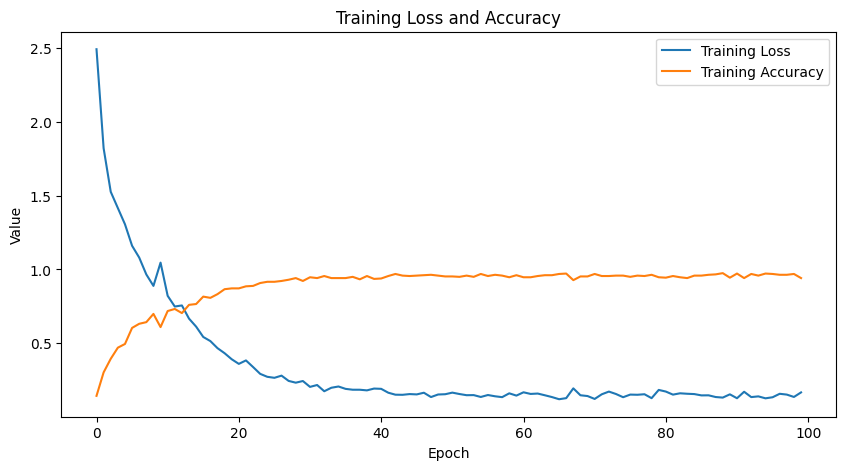

In [46]:
plt.figure(figsize=(10, 5))

# Plotting training loss
plt.plot(history.history['loss'], label='Training Loss')

# Plotting training accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')

plt.xlabel('Epoch')
plt.ylabel('Value')
plt.title('Training Loss and Accuracy')
plt.legend()

plt.show()

In [17]:
model.save('kaggle/working/myFruitclassifier001')  

INFO:tensorflow:Assets written to: kaggle/working/myFruitclassifier001\assets


INFO:tensorflow:Assets written to: kaggle/working/myFruitclassifier001\assets
